# Anchor pass-QC snATAC-seq object to scRNA-seq (GFP+ only)
- https://satijalab.org/seurat/articles/seurat5_atacseq_integration_vignette

## Set up correct conda environment

In [1]:
.libPaths()

[1] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

In [2]:
.libPaths('/home/groups/tttt/xjluo/miniconda3/envs/single_cell/lib/R/library')
.libPaths()

[1] "/home/groups/tttt/xjluo/miniconda3/envs/single_cell/lib/R/library"
[2] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

In [3]:
library(tidyverse)
library(viridis)
library(Seurat)
library(Signac)
library(Azimuth)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggpointdensity)
library(ggExtra)

set.seed(1234)
options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.

Attaching SeuratObject

Registered S3 method overwritten by 'SeuratDisk'

In [4]:
sample <- 'E'

In [5]:
# value is either 'ALL' or 'GFP' depending on the script
all_or_gfp <- 'GFP'

## STEP 0: Paths

In [6]:
data_master_dir <- '/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger'

data_master_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger"

In [7]:
rna_path <- paste0(data_master_dir, '/xjluo_analysis/step1_qc/', 'RNA', '/', 'RNA.both.conditions.annotated.Seurat.v4.rds')

rna_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger/xjluo_analysis/step1_qc/RNA/RNA.both.conditions.annotated.Seurat.v4.rds"

In [8]:
atac_dir <- '/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger/xjluo_analysis/step1_qc/ATAC'
atac_path <- paste0(atac_dir, '/2_filtered_objects/', sample, ".ATAC.filtered.Seurat.v4.rds")

atac_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/E.ATAC.filtered.Seurat.v4.rds"

In [9]:
# save anchored ATAC objects here
save_dir <- paste0(atac_dir, '/3_filtered_anchored_to_', all_or_gfp, '_RNA')

save_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger/xjluo_analysis/step1_qc/ATAC/3_filtered_anchored_to_GFP_RNA"

## STEP 1: Load data

### STEP 1.1 Load RNA object for appropriate condition
- Condition 1: all cells, OR
- Condition 2 : GFP+ sorted only

In [10]:
rna.obj.annotated.Seurat.v4 <- readRDS(rna_path)

In [11]:
rna.obj.annotated.Seurat.v4

An object of class Seurat 
52425 features across 5489 samples within 2 assays 
Active assay: SCT (20140 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, rna_only_UMAP

In [12]:
table(rna.obj.annotated.Seurat.v4$orig.ident)


 all  GFP 
2444 3045 

In [13]:
Idents(rna.obj.annotated.Seurat.v4) <- 'orig.ident'

# Uncomment below line if this notebook focuses on the GFP+ only scRNA-seq experiment
rna.obj.annotated.Seurat.v4 <- subset(x = rna.obj.annotated.Seurat.v4, idents = c('GFP'))

In [14]:
rna.obj.annotated.Seurat.v4

An object of class Seurat 
52425 features across 3045 samples within 2 assays 
Active assay: SCT (20140 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, rna_only_UMAP

### STEP 1.2: Load ATAC object (all GFP-sorted)

In [15]:
atac.obj.annotated.Seurat.v4 <- readRDS(atac_path)

In [16]:
atac.obj.annotated.Seurat.v4

An object of class Seurat 
245530 features across 2482 samples within 1 assay 
Active assay: ATAC (245530 features, 245530 variable features)
 2 dimensional reductions calculated: lsi, umap

### STEP 1.3: Inspect objects

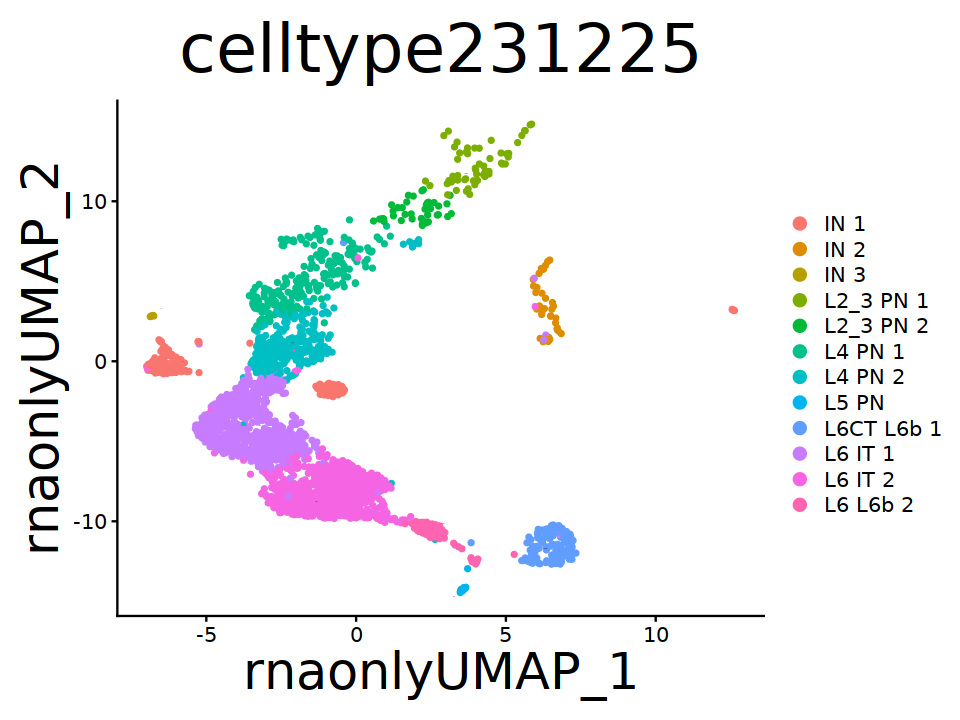

In [17]:
# RNA
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(rna.obj.annotated.Seurat.v4, shuffle=TRUE, label = TRUE, repel = TRUE, pt.size=1, label.size=0, reduction = "rna_only_UMAP", group.by = 'celltype231225', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     


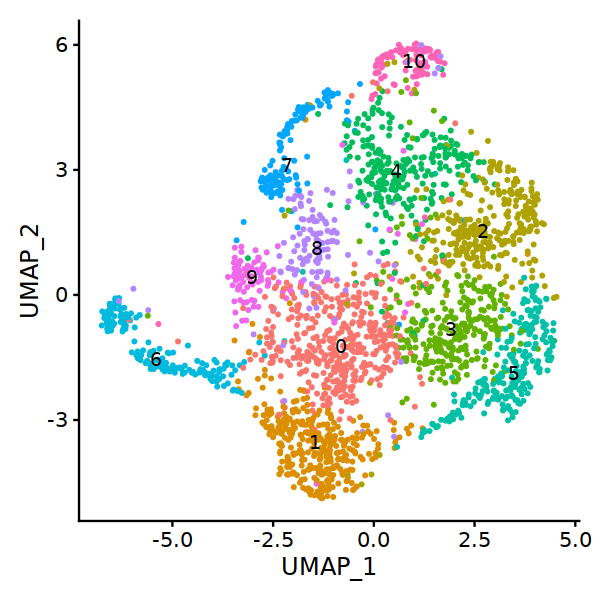

In [18]:
# ATAC
options(repr.plot.width=5, repr.plot.height=5)

DimPlot(object = atac.obj.annotated.Seurat.v4, label = TRUE) + NoLegend()

## STEP 2: Anchor ATAC to RNA

In [19]:
# quantify gene activity
DefaultAssay(atac.obj.annotated.Seurat.v4) <- 'ATAC'
gene.activities <- GeneActivity(atac.obj.annotated.Seurat.v4, features = VariableFeatures(rna.obj.annotated.Seurat.v4))

Extracting gene coordinates

Extracting reads overlapping genomic regions



In [20]:
# add gene activities as a new assay
atac.obj.annotated.Seurat.v4[["ACTIVITY"]] <- CreateAssayObject(counts = gene.activities)

# normalize gene activities
DefaultAssay(atac.obj.annotated.Seurat.v4) <- "ACTIVITY"
atac.obj.annotated.Seurat.v4 <- NormalizeData(atac.obj.annotated.Seurat.v4)
atac.obj.annotated.Seurat.v4 <- ScaleData(atac.obj.annotated.Seurat.v4, features = rownames(atac.obj.annotated.Seurat.v4))

Centering and scaling data matrix



In [21]:
# Identify anchors
transfer.anchors <- FindTransferAnchors(reference = rna.obj.annotated.Seurat.v4, 
                                        query = atac.obj.annotated.Seurat.v4, 
                                        features = VariableFeatures(object = rna.obj.annotated.Seurat.v4),
                                        reference.assay = "RNA", 
                                        query.assay = "ACTIVITY", 
                                        reduction = "cca")

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8060 anchors

Filtering anchors

	Retained 1385 anchors



## STEP 3: Annotate snATAC-seq cells via label transfer

In [22]:
table(rna.obj.annotated.Seurat.v4$celltype231225)


      IN 1       IN 2       IN 3  L2_3 PN 1  L2_3 PN 2    L4 PN 1    L4 PN 2 
       232         36          4         57         40        231        333 
     L5 PN L6CT L6b 1    L6 IT 1    L6 IT 2   L6 L6b 2 
        16        159        880        957        100 

In [23]:
celltype.predictions <- TransferData(anchorset = transfer.anchors, 
                                     refdata = rna.obj.annotated.Seurat.v4$celltype231225,
                                     weight.reduction = atac.obj.annotated.Seurat.v4[["lsi"]], 
                                     dims = 2:30)

atac.obj.annotated.Seurat.v4 <- AddMetaData(atac.obj.annotated.Seurat.v4, metadata = celltype.predictions)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [24]:
Reductions(atac.obj.annotated.Seurat.v4)

[1] "lsi"  "umap"

In [25]:
colnames(atac.obj.annotated.Seurat.v4@meta.data)

[1] "orig.ident"                  "nCount_ATAC"                
 [3] "nFeature_ATAC"               "nucleosome_signal"          
 [5] "nucleosome_percentile"       "TSS.enrichment"             
 [7] "TSS.percentile"              "ATAC_snn_res.1.2"           
 [9] "seurat_clusters"             "nCount_ACTIVITY"            
[11] "nFeature_ACTIVITY"           "predicted.id"               
[13] "prediction.score.L6.IT.2"    "prediction.score.IN.1"      
[15] "prediction.score.L4.PN.1"    "prediction.score.L6.IT.1"   
[17] "prediction.score.L2_3.PN.1"  "prediction.score.L6CT.L6b.1"
[19] "prediction.score.L4.PN.2"    "prediction.score.L6.L6b.2"  
[21] "prediction.score.IN.2"       "prediction.score.L5.PN"     
[23] "prediction.score.L2_3.PN.2"  "prediction.score.IN.3"      
[25] "prediction.score.max"

## STEP 4: Visualize anchoring result

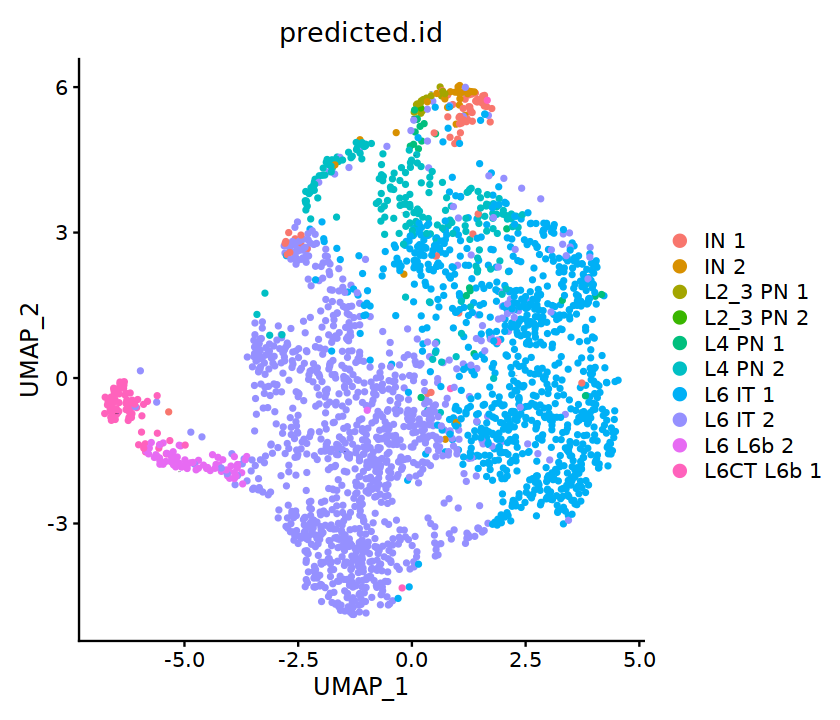

In [26]:
options(repr.plot.width=7, repr.plot.height=6)

DimPlot(atac.obj.annotated.Seurat.v4, 
        label = TRUE, 
        repel = TRUE, 
        pt.size=1, 
        label.size=0, 
        reduction = "umap", 
        group.by = 'predicted.id')


In [27]:
table(atac.obj.annotated.Seurat.v4$predicted.id)


      IN 1       IN 2  L2_3 PN 1  L2_3 PN 2    L4 PN 1    L4 PN 2    L6 IT 1 
        59         27         14          1         22        195        892 
   L6 IT 2   L6 L6b 2 L6CT L6b 1 
      1123         71         78 

## STEP 5: Save labeled snATAC-seq object 

In [28]:
save_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger/xjluo_analysis/step1_qc/ATAC/3_filtered_anchored_to_GFP_RNA"

In [29]:
saveRDS_path <- paste0(save_dir, '/', sample, ".ATAC.anchored.", all_or_gfp, ".annotated.Seurat.v4.rds")
saveRDS(atac.obj.annotated.Seurat.v4, file = saveRDS_path)

atac.obj.annotated.Seurat.v4
Version(atac.obj.annotated.Seurat.v4)

print('Object saved')

An object of class Seurat 
247601 features across 2482 samples within 2 assays 
Active assay: ACTIVITY (2071 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: lsi, umap

[1] '4.1.4'

[1] "Object saved"


# END